## CONTEXT
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

## Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

1.0 Normal
2.0 Suspect
3.0 Pathological


## TASK

Create a multiclass model to classify CTG features into the three fetal health states.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('fetal_health.csv')
data.head(10)
data_copy = data.copy()

fetal_health_dict ={1.0 : "Normal", 2.0 : "Suspect", 3.0 : "Pathological"}
data_copy['fetal_health_original'] = data_copy.fetal_health.map(fetal_health_dict)

fetal_health_dict_encode = {1.0 : 0 , 2.0 : 1, 3.0 : 2}
data_copy['fetal_health'] = data_copy.fetal_health.map(fetal_health_dict_encode)
data_copy.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,fetal_health_original
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,1,Suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0,Normal


In [64]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

# EDA

C:\Python310\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



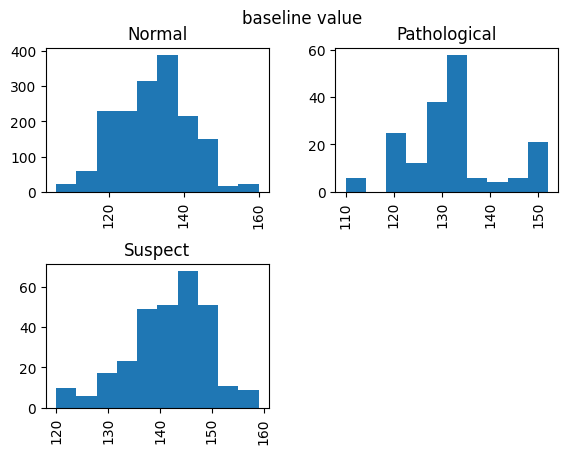

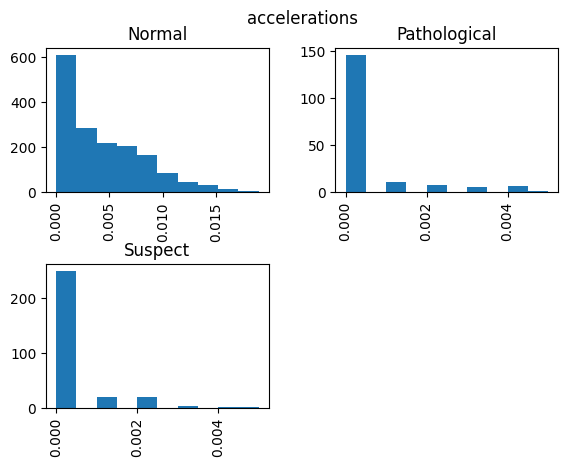

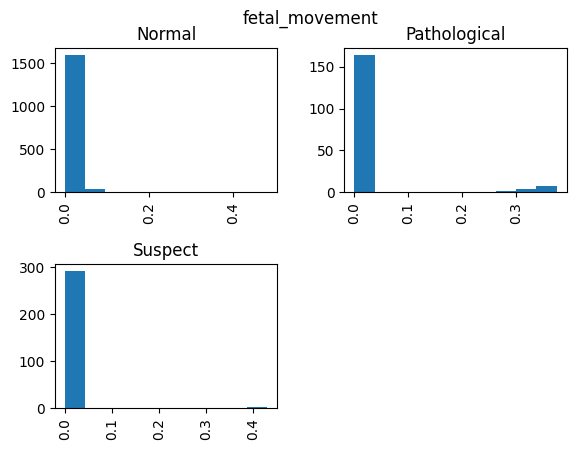

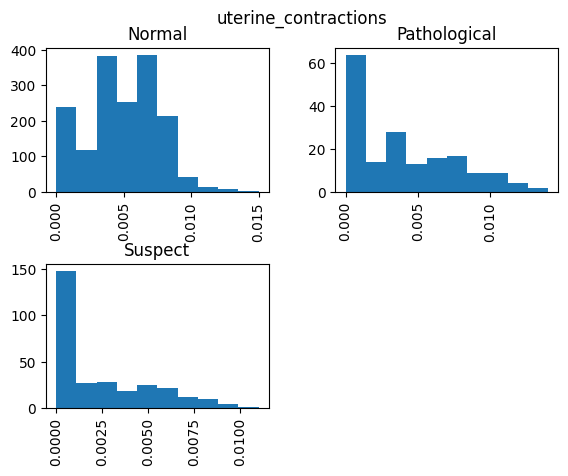

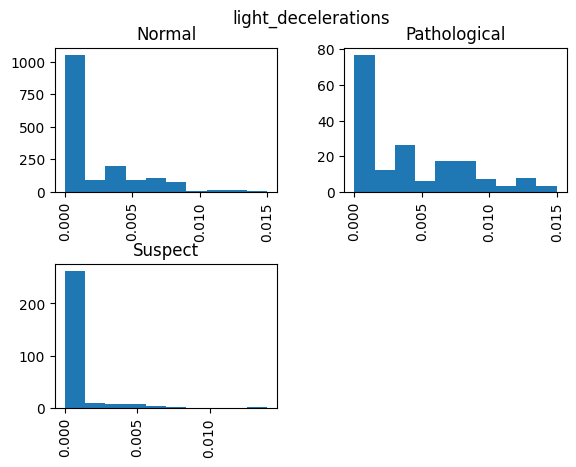

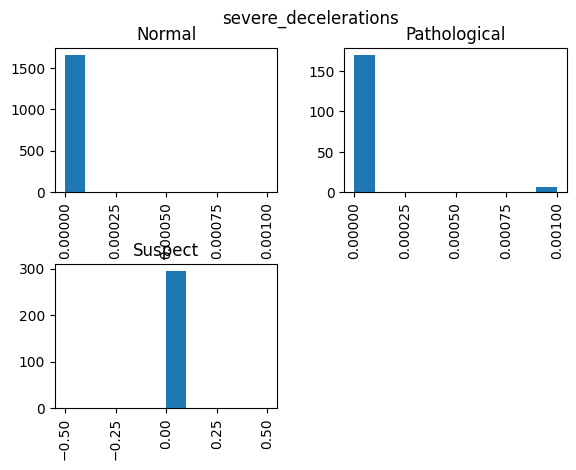

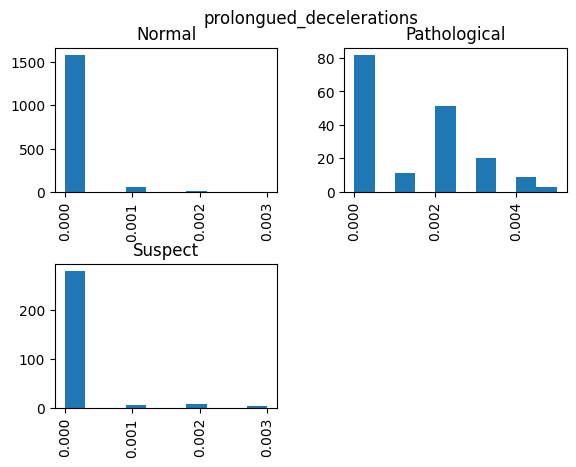

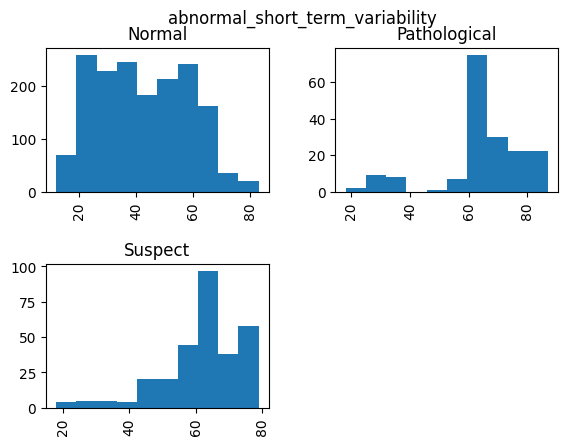

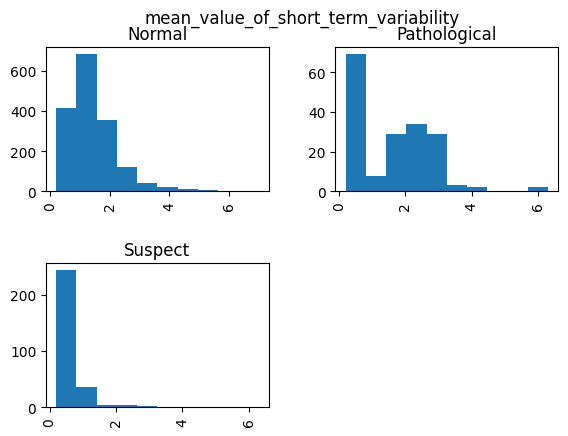

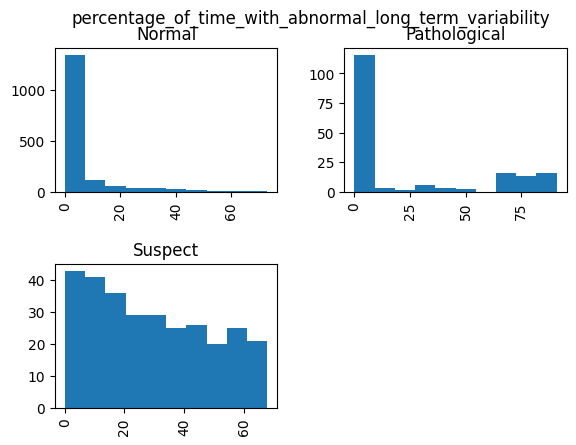

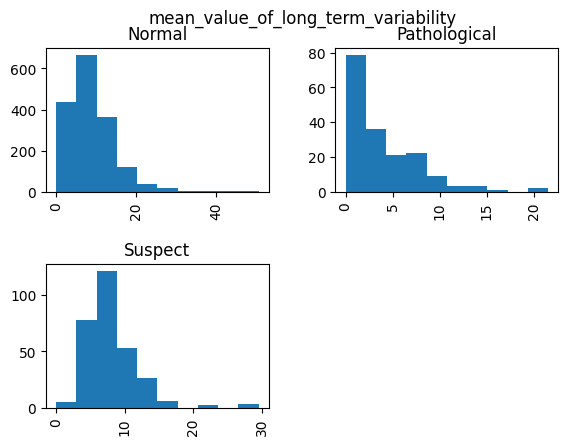

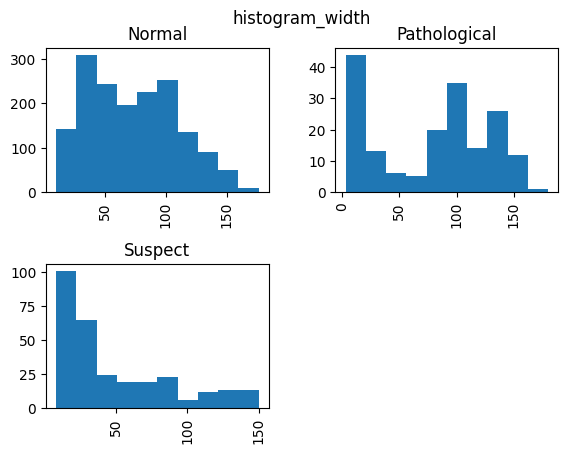

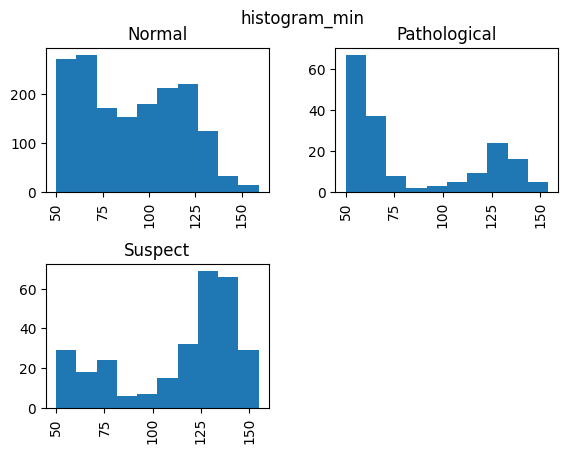

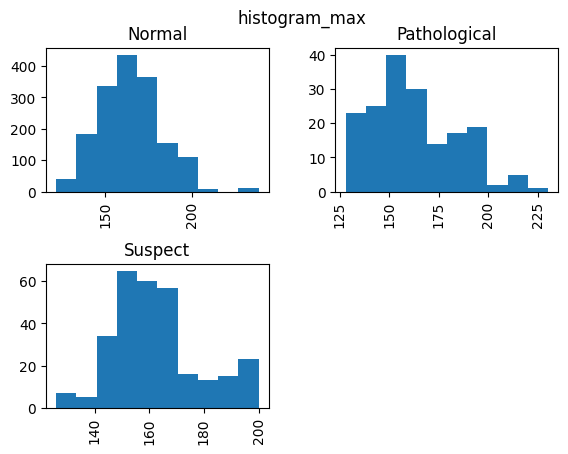

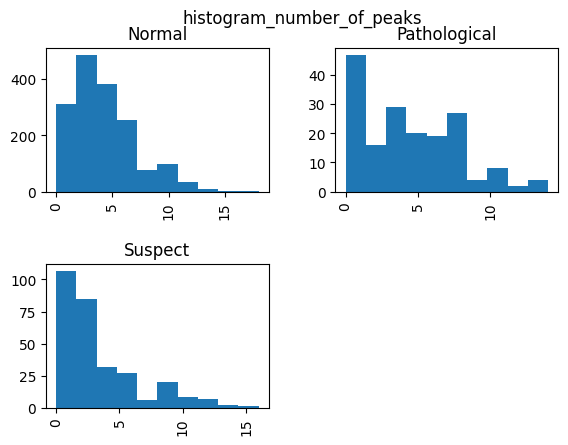

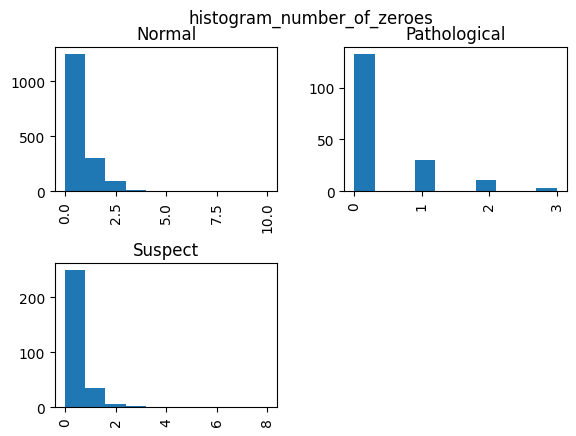

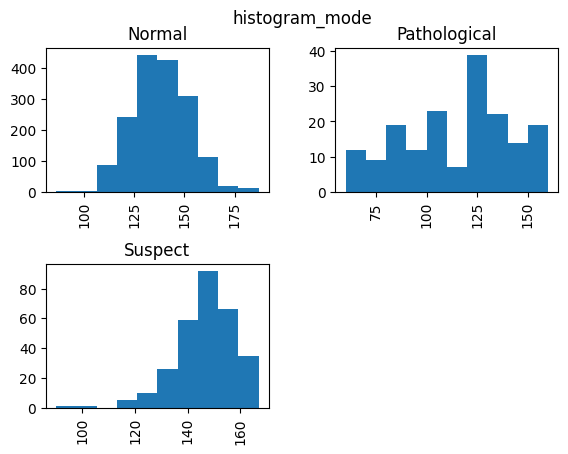

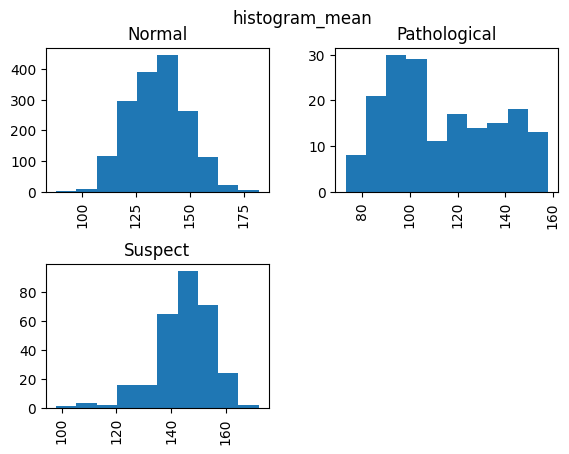

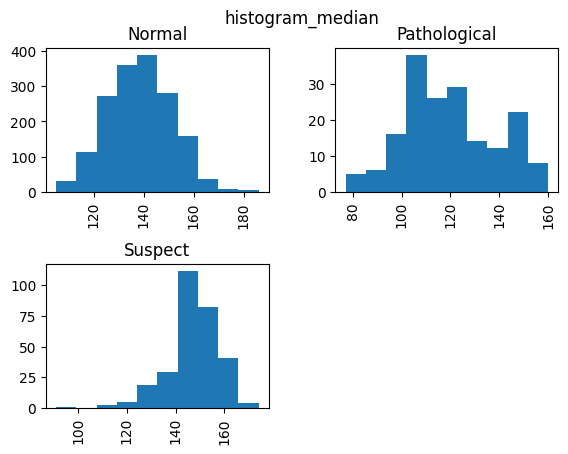

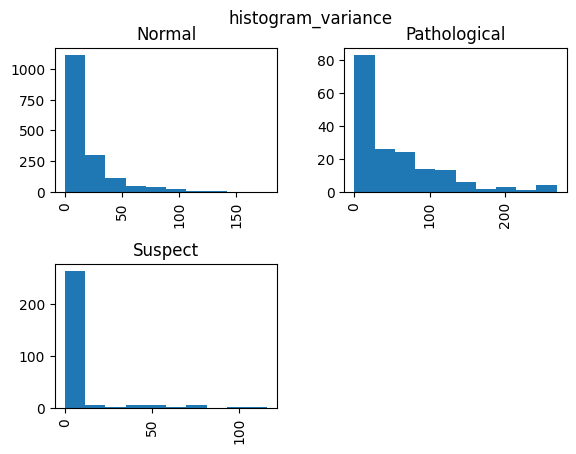

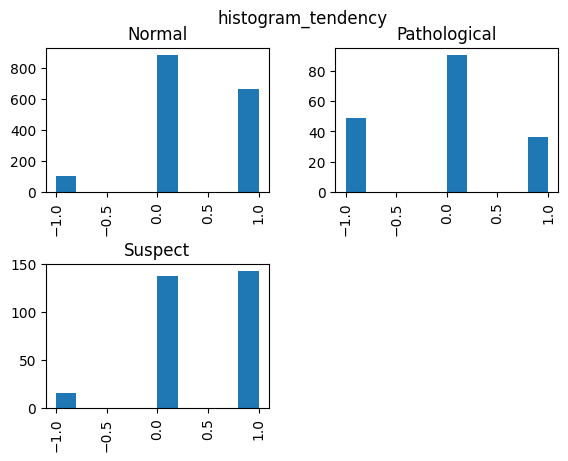

In [65]:
for column in data_copy.columns:
    if column == 'fetal_health':
        break
    data_copy[column].hist(by = data_copy['fetal_health_original'])
    plt.suptitle(column)

# Hypothesis Testing

In [119]:
from scipy.stats import f_oneway

# Grouping data based on fetal_health categories
gk = data_copy.groupby('fetal_health_original')

for column in data_copy.columns:
    if column == 'fetal_health':
        break
        
    normal = gk.get_group('Normal')[column]
    suspect = gk.get_group('Suspect')[column]
    pathological = gk.get_group('Pathological')[column]
    
    print("ANOVA for "+column)
    
    f,p = f_oneway(normal, suspect, pathological)
#     f_stat = "F-Statistic = {f : .5f}"
#     p_value = "P Value = {p : .7f}"
    print("F-Statistic = {f_statistic} and P Value = {p_value} ".format(f_statistic= round(f,6),p_value = round(p,5)))
    

ANOVA for baseline value
F-Statistic = 140.621076 and P Value = 0.0 
ANOVA for accelerations
F-Statistic = 196.027523 and P Value = 0.0 
ANOVA for fetal_movement
F-Statistic = 11.679797 and P Value = 1e-05 
ANOVA for uterine_contractions
F-Statistic = 93.715743 and P Value = 0.0 
ANOVA for light_decelerations
F-Statistic = 66.864754 and P Value = 0.0 
ANOVA for severe_decelerations
F-Statistic = 28.448156 and P Value = 0.0 
ANOVA for prolongued_decelerations
F-Statistic = 505.853206 and P Value = 0.0 
ANOVA for abnormal_short_term_variability
F-Statistic = 343.820419 and P Value = 0.0 
ANOVA for mean_value_of_short_term_variability
F-Statistic = 119.882006 and P Value = 0.0 
ANOVA for percentage_of_time_with_abnormal_long_term_variability
F-Statistic = 345.156385 and P Value = 0.0 
ANOVA for mean_value_of_long_term_variability
F-Statistic = 70.174093 and P Value = 0.0 
ANOVA for histogram_width
F-Statistic = 55.088241 and P Value = 0.0 
ANOVA for histogram_min
F-Statistic = 87.340503 a

# Feature selection using Mutual information.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import plotly.express as px
X_train, X_test, Y_train,Y_test = train_test_split(data_copy.drop(labels= ['fetal_health','fetal_health_original'],axis = 1),
                                                   data_copy['fetal_health'],
                                                  test_size = 0.3,
                                                  random_state = 0)

mutual_info = mutual_info_classif(X_train,Y_train)
df_mutual_info = pd.DataFrame({"Columns" : data_copy.drop(labels = ['fetal_health','fetal_health_original'],axis = 1).columns,
                              "Mutual Info" : mutual_info})

fig = px.bar(df_mutual_info, x = "Columns", y = "Mutual Info")
fig.show()

In [93]:
from sklearn.feature_selection import SelectKBest
select_top_features = SelectKBest(mutual_info_classif, k = 10)
select_top_features.fit(X_train,Y_train)
X_train.columns[select_top_features.get_support()]

Index(['baseline value', 'accelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_width', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance'],
      dtype='object')

In [94]:
X_test = X_test[[X_train.columns][0]]

In [103]:
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score



model_xgboost = xgboost.XGBClassifier(learning_rate = 0.1, max_depth =5,
                                     n_estimators = 5000,
                                     subsample = 0.5,
                                     colsample_bytree = 0.5,
                                      verbosity = 1,
                                      eval_metric = 'auc'
                                     )

eval_set = [(X_test,Y_test)]

model_xgboost.fit(X_train,Y_train,early_stopping_rounds = 10,eval_set = eval_set,verbose = True)

[0]	validation_0-auc:0.95462
[1]	validation_0-auc:0.96214
[2]	validation_0-auc:0.96498
[3]	validation_0-auc:0.96137
[4]	validation_0-auc:0.96416
[5]	validation_0-auc:0.96411
[6]	validation_0-auc:0.96634
[7]	validation_0-auc:0.96745
[8]	validation_0-auc:0.96821
[9]	validation_0-auc:0.97013
[10]	validation_0-auc:0.97163
[11]	validation_0-auc:0.97395
[12]	validation_0-auc:0.97426
[13]	validation_0-auc:0.97388
[14]	validation_0-auc:0.97553
[15]	validation_0-auc:0.97534
[16]	validation_0-auc:0.97533
[17]	validation_0-auc:0.97687
[18]	validation_0-auc:0.97752
[19]	validation_0-auc:0.97823
[20]	validation_0-auc:0.97827
[21]	validation_0-auc:0.97826
[22]	validation_0-auc:0.97903
[23]	validation_0-auc:0.97895
[24]	validation_0-auc:0.97947
[25]	validation_0-auc:0.97989
[26]	validation_0-auc:0.97967
[27]	validation_0-auc:0.98050
[28]	validation_0-auc:0.98030
[29]	validation_0-auc:0.98067
[30]	validation_0-auc:0.98106
[31]	validation_0-auc:0.98203
[32]	validation_0-auc:0.98201
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [122]:
prediction = model_xgboost.predict(X_test)
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0,

In [123]:
prediction[0]

0

## Model Evaluation

In [104]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       494
           1       0.89      0.74      0.81        86
           2       0.95      0.95      0.95        58

    accuracy                           0.95       638
   macro avg       0.93      0.89      0.91       638
weighted avg       0.95      0.95      0.95       638



## Hyperparametric Tuning

In [115]:
learning_rate_list = [0.02,0.05,0.1,0.105]
max_depth_list = [2,3,5,7]
n_estimators_list = [1000,2000,3000,4000,5000]

params_dict = {
    "learning_rate" : learning_rate_list,
    "max_depth" : max_depth_list,
    "n_estimators" : n_estimators_list
}

def my_auc_score(model,x,y):
    return roc_auc_score(Y_test,model.predict(X_test))

model_xgboost_hp = GridSearchCV(estimator = xgboost.XGBClassifier(subsample = 0.5,
                                                                 colsample_bytree = 0.25,
                                                                 eval_metric = 'auc',
                                                                 use_label_encoder = False),
                               param_grid = params_dict,
                               cv=5,
                               scoring = my_f1_score,
                               return_train_score = True,
                               verbose = 4)
model_xgboost_hp.fit(X_train,Y_train)

C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.931, test=0.931) total time=   0.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.947, test=0.947) total time=   0.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.922, test=0.922) total time=   0.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.912, test=0.912) total time=   0.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.930, test=0.930) total time=   0.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.914, test=0.914) total time=   1.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.939, test=0.939) total time=   1.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.948, test=0.948) total time=   1.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.931, test=0.931) total time=   1.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.922, test=0.922) total time=   1.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.906, test=0.906) total time=   2.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.939, test=0.939) total time=   2.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.922, test=0.922) total time=   2.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.923, test=0.923) total time=   2.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.922, test=0.922) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=2, n_estimators=4000;, score=(train=0.897, test=0.897) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=2, n_estimators=4000;, score=(train=0.947, test=0.947) total time=   3.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=2, n_estimators=4000;, score=(train=0.922, test=0.922) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=2, n_estimators=4000;, score=(train=0.914, test=0.914) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=2, n_estimators=4000;, score=(train=0.914, test=0.914) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=2, n_estimators=5000;, score=(train=0.906, test=0.906) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=2, n_estimators=5000;, score=(train=0.938, test=0.938) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=2, n_estimators=5000;, score=(train=0.912, test=0.912) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=2, n_estimators=5000;, score=(train=0.914, test=0.914) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=2, n_estimators=5000;, score=(train=0.914, test=0.914) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.940, test=0.940) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.938, test=0.938) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.939, test=0.939) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.920, test=0.920) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.920, test=0.920) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.931, test=0.931) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.939, test=0.939) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.939, test=0.939) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.922, test=0.922) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=3, n_estimators=2000;, score=(train=0.904, test=0.904) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.931, test=0.931) total time=   2.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.939, test=0.939) total time=   2.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.938, test=0.938) total time=   2.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.922, test=0.922) total time=   2.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=3, n_estimators=3000;, score=(train=0.904, test=0.904) total time=   2.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=3, n_estimators=4000;, score=(train=0.931, test=0.931) total time=   3.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=3, n_estimators=4000;, score=(train=0.930, test=0.930) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=3, n_estimators=4000;, score=(train=0.930, test=0.930) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=3, n_estimators=4000;, score=(train=0.922, test=0.922) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=3, n_estimators=4000;, score=(train=0.904, test=0.904) total time=   3.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=3, n_estimators=5000;, score=(train=0.914, test=0.914) total time=   4.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=3, n_estimators=5000;, score=(train=0.920, test=0.920) total time=   4.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=3, n_estimators=5000;, score=(train=0.930, test=0.930) total time=   4.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=3, n_estimators=5000;, score=(train=0.922, test=0.922) total time=   4.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=3, n_estimators=5000;, score=(train=0.904, test=0.904) total time=   4.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.940, test=0.940) total time=   1.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.929, test=0.929) total time=   1.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.939, test=0.939) total time=   1.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.930, test=0.930) total time=   1.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=5, n_estimators=1000;, score=(train=0.912, test=0.912) total time=   1.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=0.931, test=0.931) total time=   2.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=0.927, test=0.927) total time=   2.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=0.930, test=0.930) total time=   2.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=0.922, test=0.922) total time=   2.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=5, n_estimators=2000;, score=(train=0.904, test=0.904) total time=   2.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=0.931, test=0.931) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=0.919, test=0.919) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=0.920, test=0.920) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=0.922, test=0.922) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=5, n_estimators=3000;, score=(train=0.904, test=0.904) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=5, n_estimators=4000;, score=(train=0.923, test=0.923) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=5, n_estimators=4000;, score=(train=0.919, test=0.919) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=5, n_estimators=4000;, score=(train=0.920, test=0.920) total time=   4.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=5, n_estimators=4000;, score=(train=0.922, test=0.922) total time=   4.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=5, n_estimators=4000;, score=(train=0.904, test=0.904) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=5, n_estimators=5000;, score=(train=0.914, test=0.914) total time=   5.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=5, n_estimators=5000;, score=(train=0.909, test=0.909) total time=   4.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=5, n_estimators=5000;, score=(train=0.920, test=0.920) total time=   4.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=5, n_estimators=5000;, score=(train=0.914, test=0.914) total time=   5.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=5, n_estimators=5000;, score=(train=0.904, test=0.904) total time=   4.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=7, n_estimators=1000;, score=(train=0.931, test=0.931) total time=   1.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=7, n_estimators=1000;, score=(train=0.919, test=0.919) total time=   1.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=7, n_estimators=1000;, score=(train=0.930, test=0.930) total time=   1.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=7, n_estimators=1000;, score=(train=0.922, test=0.922) total time=   1.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=7, n_estimators=1000;, score=(train=0.903, test=0.903) total time=   1.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=7, n_estimators=2000;, score=(train=0.931, test=0.931) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=7, n_estimators=2000;, score=(train=0.927, test=0.927) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=7, n_estimators=2000;, score=(train=0.930, test=0.930) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=7, n_estimators=2000;, score=(train=0.914, test=0.914) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=7, n_estimators=2000;, score=(train=0.895, test=0.895) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=7, n_estimators=3000;, score=(train=0.923, test=0.923) total time=   3.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=7, n_estimators=3000;, score=(train=0.919, test=0.919) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=7, n_estimators=3000;, score=(train=0.930, test=0.930) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=7, n_estimators=3000;, score=(train=0.914, test=0.914) total time=   3.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=7, n_estimators=3000;, score=(train=0.904, test=0.904) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=7, n_estimators=4000;, score=(train=0.914, test=0.914) total time=   4.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=7, n_estimators=4000;, score=(train=0.909, test=0.909) total time=   4.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=7, n_estimators=4000;, score=(train=0.920, test=0.920) total time=   4.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=7, n_estimators=4000;, score=(train=0.914, test=0.914) total time=   4.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=7, n_estimators=4000;, score=(train=0.885, test=0.885) total time=   4.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.02, max_depth=7, n_estimators=5000;, score=(train=0.904, test=0.904) total time=   5.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.02, max_depth=7, n_estimators=5000;, score=(train=0.899, test=0.899) total time=   5.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.02, max_depth=7, n_estimators=5000;, score=(train=0.911, test=0.911) total time=   5.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.02, max_depth=7, n_estimators=5000;, score=(train=0.914, test=0.914) total time=   5.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.02, max_depth=7, n_estimators=5000;, score=(train=0.885, test=0.885) total time=   5.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.904, test=0.904) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.938, test=0.938) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.929, test=0.929) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.922, test=0.922) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=1000;, score=(train=0.930, test=0.930) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.904, test=0.904) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.938, test=0.938) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.920, test=0.920) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.922, test=0.922) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=2000;, score=(train=0.914, test=0.914) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.897, test=0.897) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.920, test=0.920) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.930, test=0.930) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.922, test=0.922) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=3000;, score=(train=0.914, test=0.914) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=4000;, score=(train=0.897, test=0.897) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=4000;, score=(train=0.920, test=0.920) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=4000;, score=(train=0.920, test=0.920) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=4000;, score=(train=0.922, test=0.922) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=4000;, score=(train=0.914, test=0.914) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=5000;, score=(train=0.904, test=0.904) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=5000;, score=(train=0.920, test=0.920) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=5000;, score=(train=0.920, test=0.920) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=5000;, score=(train=0.912, test=0.912) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=5000;, score=(train=0.914, test=0.914) total time=   4.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.922, test=0.922) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.930, test=0.930) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.930, test=0.930) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.930, test=0.930) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=(train=0.904, test=0.904) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.904, test=0.904) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.930, test=0.930) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.930, test=0.930) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.922, test=0.922) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=2000;, score=(train=0.904, test=0.904) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.904, test=0.904) total time=   2.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.920, test=0.920) total time=   2.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.930, test=0.930) total time=   2.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.922, test=0.922) total time=   2.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=3000;, score=(train=0.904, test=0.904) total time=   2.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=4000;, score=(train=0.914, test=0.914) total time=   3.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=4000;, score=(train=0.901, test=0.901) total time=   3.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=4000;, score=(train=0.930, test=0.930) total time=   3.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=4000;, score=(train=0.922, test=0.922) total time=   3.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=4000;, score=(train=0.904, test=0.904) total time=   3.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=5000;, score=(train=0.914, test=0.914) total time=   4.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=5000;, score=(train=0.901, test=0.901) total time=   4.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=5000;, score=(train=0.930, test=0.930) total time=   4.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=5000;, score=(train=0.923, test=0.923) total time=   4.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=5000;, score=(train=0.904, test=0.904) total time=   4.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=0.931, test=0.931) total time=   1.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=0.911, test=0.911) total time=   1.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=0.920, test=0.920) total time=   1.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=0.912, test=0.912) total time=   1.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=(train=0.912, test=0.912) total time=   1.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=0.923, test=0.923) total time=   2.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=0.911, test=0.911) total time=   1.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=0.911, test=0.911) total time=   1.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=0.912, test=0.912) total time=   1.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=2000;, score=(train=0.895, test=0.895) total time=   1.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=0.923, test=0.923) total time=   2.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=0.911, test=0.911) total time=   2.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=0.911, test=0.911) total time=   2.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=0.904, test=0.904) total time=   2.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=3000;, score=(train=0.885, test=0.885) total time=   2.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=4000;, score=(train=0.923, test=0.923) total time=   3.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=4000;, score=(train=0.893, test=0.893) total time=   3.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=4000;, score=(train=0.911, test=0.911) total time=   3.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=4000;, score=(train=0.912, test=0.912) total time=   3.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=4000;, score=(train=0.885, test=0.885) total time=   3.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=5000;, score=(train=0.923, test=0.923) total time=   4.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=5000;, score=(train=0.891, test=0.891) total time=   4.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=5000;, score=(train=0.911, test=0.911) total time=   4.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=5000;, score=(train=0.897, test=0.897) total time=   4.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=5000;, score=(train=0.885, test=0.885) total time=   4.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=7, n_estimators=1000;, score=(train=0.915, test=0.915) total time=   1.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=7, n_estimators=1000;, score=(train=0.911, test=0.911) total time=   1.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=7, n_estimators=1000;, score=(train=0.920, test=0.920) total time=   1.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=7, n_estimators=1000;, score=(train=0.904, test=0.904) total time=   1.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=7, n_estimators=1000;, score=(train=0.912, test=0.912) total time=   1.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=7, n_estimators=2000;, score=(train=0.923, test=0.923) total time=   2.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=7, n_estimators=2000;, score=(train=0.919, test=0.919) total time=   1.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=7, n_estimators=2000;, score=(train=0.920, test=0.920) total time=   2.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=7, n_estimators=2000;, score=(train=0.914, test=0.914) total time=   2.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=7, n_estimators=2000;, score=(train=0.885, test=0.885) total time=   1.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=7, n_estimators=3000;, score=(train=0.914, test=0.914) total time=   2.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=7, n_estimators=3000;, score=(train=0.891, test=0.891) total time=   2.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=7, n_estimators=3000;, score=(train=0.920, test=0.920) total time=   2.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=7, n_estimators=3000;, score=(train=0.897, test=0.897) total time=   2.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=7, n_estimators=3000;, score=(train=0.885, test=0.885) total time=   2.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=7, n_estimators=4000;, score=(train=0.914, test=0.914) total time=   3.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=7, n_estimators=4000;, score=(train=0.883, test=0.883) total time=   3.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=7, n_estimators=4000;, score=(train=0.920, test=0.920) total time=   3.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=7, n_estimators=4000;, score=(train=0.897, test=0.897) total time=   3.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=7, n_estimators=4000;, score=(train=0.885, test=0.885) total time=   3.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.05, max_depth=7, n_estimators=5000;, score=(train=0.904, test=0.904) total time=   4.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.05, max_depth=7, n_estimators=5000;, score=(train=0.891, test=0.891) total time=   4.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.05, max_depth=7, n_estimators=5000;, score=(train=0.920, test=0.920) total time=   4.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.05, max_depth=7, n_estimators=5000;, score=(train=0.897, test=0.897) total time=   4.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.05, max_depth=7, n_estimators=5000;, score=(train=0.885, test=0.885) total time=   4.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.897, test=0.897) total time=   0.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.938, test=0.938) total time=   0.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.920, test=0.920) total time=   0.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.931, test=0.931) total time=   0.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.914, test=0.914) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.906, test=0.906) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.920, test=0.920) total time=   1.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.911, test=0.911) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.922, test=0.922) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.914, test=0.914) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.922, test=0.922) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.920, test=0.920) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.911, test=0.911) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.903, test=0.903) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.914, test=0.914) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=4000;, score=(train=0.906, test=0.906) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=4000;, score=(train=0.911, test=0.911) total time=   3.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=4000;, score=(train=0.911, test=0.911) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=4000;, score=(train=0.912, test=0.912) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=4000;, score=(train=0.914, test=0.914) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=5000;, score=(train=0.906, test=0.906) total time=   3.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=5000;, score=(train=0.911, test=0.911) total time=   3.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=5000;, score=(train=0.911, test=0.911) total time=   3.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=5000;, score=(train=0.897, test=0.897) total time=   3.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=5000;, score=(train=0.914, test=0.914) total time=   3.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.923, test=0.923) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.920, test=0.920) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.930, test=0.930) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.920, test=0.920) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.904, test=0.904) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=0.914, test=0.914) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=0.920, test=0.920) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=0.930, test=0.930) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=0.922, test=0.922) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=(train=0.895, test=0.895) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=0.914, test=0.914) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=0.911, test=0.911) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=0.922, test=0.922) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=0.914, test=0.914) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=3000;, score=(train=0.895, test=0.895) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=4000;, score=(train=0.914, test=0.914) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=4000;, score=(train=0.911, test=0.911) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=4000;, score=(train=0.922, test=0.922) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=4000;, score=(train=0.904, test=0.904) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=4000;, score=(train=0.895, test=0.895) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=5000;, score=(train=0.922, test=0.922) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=5000;, score=(train=0.901, test=0.901) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=5000;, score=(train=0.922, test=0.922) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=5000;, score=(train=0.904, test=0.904) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=5000;, score=(train=0.904, test=0.904) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=0.923, test=0.923) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=0.901, test=0.901) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=0.920, test=0.920) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=0.904, test=0.904) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=(train=0.895, test=0.895) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=0.904, test=0.904) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=0.901, test=0.901) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=0.911, test=0.911) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=0.914, test=0.914) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=(train=0.885, test=0.885) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=0.914, test=0.914) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=0.901, test=0.901) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=0.911, test=0.911) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=0.904, test=0.904) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=3000;, score=(train=0.885, test=0.885) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=4000;, score=(train=0.904, test=0.904) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=4000;, score=(train=0.891, test=0.891) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=4000;, score=(train=0.911, test=0.911) total time=   3.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=4000;, score=(train=0.904, test=0.904) total time=   3.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=4000;, score=(train=0.885, test=0.885) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=5000;, score=(train=0.904, test=0.904) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=5000;, score=(train=0.881, test=0.881) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=5000;, score=(train=0.911, test=0.911) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=5000;, score=(train=0.904, test=0.904) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=5000;, score=(train=0.885, test=0.885) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=7, n_estimators=1000;, score=(train=0.930, test=0.930) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=7, n_estimators=1000;, score=(train=0.901, test=0.901) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=7, n_estimators=1000;, score=(train=0.911, test=0.911) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=7, n_estimators=1000;, score=(train=0.904, test=0.904) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=7, n_estimators=1000;, score=(train=0.885, test=0.885) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=7, n_estimators=2000;, score=(train=0.922, test=0.922) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=7, n_estimators=2000;, score=(train=0.891, test=0.891) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=7, n_estimators=2000;, score=(train=0.911, test=0.911) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=7, n_estimators=2000;, score=(train=0.904, test=0.904) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=7, n_estimators=2000;, score=(train=0.885, test=0.885) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=7, n_estimators=3000;, score=(train=0.922, test=0.922) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=7, n_estimators=3000;, score=(train=0.891, test=0.891) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=7, n_estimators=3000;, score=(train=0.911, test=0.911) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=7, n_estimators=3000;, score=(train=0.904, test=0.904) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=7, n_estimators=3000;, score=(train=0.885, test=0.885) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=7, n_estimators=4000;, score=(train=0.922, test=0.922) total time=   3.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=7, n_estimators=4000;, score=(train=0.891, test=0.891) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=7, n_estimators=4000;, score=(train=0.911, test=0.911) total time=   3.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=7, n_estimators=4000;, score=(train=0.904, test=0.904) total time=   3.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=7, n_estimators=4000;, score=(train=0.885, test=0.885) total time=   3.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.1, max_depth=7, n_estimators=5000;, score=(train=0.922, test=0.922) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.1, max_depth=7, n_estimators=5000;, score=(train=0.891, test=0.891) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.1, max_depth=7, n_estimators=5000;, score=(train=0.911, test=0.911) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.1, max_depth=7, n_estimators=5000;, score=(train=0.912, test=0.912) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.1, max_depth=7, n_estimators=5000;, score=(train=0.885, test=0.885) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=2, n_estimators=1000;, score=(train=0.897, test=0.897) total time=   0.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=2, n_estimators=1000;, score=(train=0.930, test=0.930) total time=   0.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=2, n_estimators=1000;, score=(train=0.920, test=0.920) total time=   0.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=2, n_estimators=1000;, score=(train=0.912, test=0.912) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=2, n_estimators=1000;, score=(train=0.914, test=0.914) total time=   0.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=2, n_estimators=2000;, score=(train=0.914, test=0.914) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=2, n_estimators=2000;, score=(train=0.920, test=0.920) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=2, n_estimators=2000;, score=(train=0.912, test=0.912) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=2, n_estimators=2000;, score=(train=0.912, test=0.912) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=2, n_estimators=2000;, score=(train=0.914, test=0.914) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=2, n_estimators=3000;, score=(train=0.923, test=0.923) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=2, n_estimators=3000;, score=(train=0.920, test=0.920) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=2, n_estimators=3000;, score=(train=0.911, test=0.911) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=2, n_estimators=3000;, score=(train=0.903, test=0.903) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=2, n_estimators=3000;, score=(train=0.914, test=0.914) total time=   2.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=2, n_estimators=4000;, score=(train=0.923, test=0.923) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=2, n_estimators=4000;, score=(train=0.920, test=0.920) total time=   3.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=2, n_estimators=4000;, score=(train=0.920, test=0.920) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=2, n_estimators=4000;, score=(train=0.912, test=0.912) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=2, n_estimators=4000;, score=(train=0.914, test=0.914) total time=   3.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=2, n_estimators=5000;, score=(train=0.914, test=0.914) total time=   3.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=2, n_estimators=5000;, score=(train=0.920, test=0.920) total time=   3.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=2, n_estimators=5000;, score=(train=0.920, test=0.920) total time=   3.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=2, n_estimators=5000;, score=(train=0.922, test=0.922) total time=   3.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=2, n_estimators=5000;, score=(train=0.914, test=0.914) total time=   3.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=3, n_estimators=1000;, score=(train=0.931, test=0.931) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=3, n_estimators=1000;, score=(train=0.920, test=0.920) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=3, n_estimators=1000;, score=(train=0.930, test=0.930) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=3, n_estimators=1000;, score=(train=0.912, test=0.912) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=3, n_estimators=1000;, score=(train=0.904, test=0.904) total time=   0.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=3, n_estimators=2000;, score=(train=0.914, test=0.914) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=3, n_estimators=2000;, score=(train=0.920, test=0.920) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=3, n_estimators=2000;, score=(train=0.930, test=0.930) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=3, n_estimators=2000;, score=(train=0.922, test=0.922) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=3, n_estimators=2000;, score=(train=0.914, test=0.914) total time=   1.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=3, n_estimators=3000;, score=(train=0.914, test=0.914) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=3, n_estimators=3000;, score=(train=0.920, test=0.920) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=3, n_estimators=3000;, score=(train=0.930, test=0.930) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=3, n_estimators=3000;, score=(train=0.914, test=0.914) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=3, n_estimators=3000;, score=(train=0.904, test=0.904) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=3, n_estimators=4000;, score=(train=0.914, test=0.914) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=3, n_estimators=4000;, score=(train=0.911, test=0.911) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=3, n_estimators=4000;, score=(train=0.930, test=0.930) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=3, n_estimators=4000;, score=(train=0.904, test=0.904) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=3, n_estimators=4000;, score=(train=0.904, test=0.904) total time=   3.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=3, n_estimators=5000;, score=(train=0.914, test=0.914) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=3, n_estimators=5000;, score=(train=0.911, test=0.911) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=3, n_estimators=5000;, score=(train=0.920, test=0.920) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=3, n_estimators=5000;, score=(train=0.904, test=0.904) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=3, n_estimators=5000;, score=(train=0.904, test=0.904) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=5, n_estimators=1000;, score=(train=0.923, test=0.923) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=5, n_estimators=1000;, score=(train=0.911, test=0.911) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=5, n_estimators=1000;, score=(train=0.912, test=0.912) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=5, n_estimators=1000;, score=(train=0.912, test=0.912) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=5, n_estimators=1000;, score=(train=0.885, test=0.885) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=5, n_estimators=2000;, score=(train=0.914, test=0.914) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=5, n_estimators=2000;, score=(train=0.911, test=0.911) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=5, n_estimators=2000;, score=(train=0.920, test=0.920) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=5, n_estimators=2000;, score=(train=0.904, test=0.904) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=5, n_estimators=2000;, score=(train=0.885, test=0.885) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=5, n_estimators=3000;, score=(train=0.914, test=0.914) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=5, n_estimators=3000;, score=(train=0.891, test=0.891) total time=   2.4s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=5, n_estimators=3000;, score=(train=0.930, test=0.930) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=5, n_estimators=3000;, score=(train=0.904, test=0.904) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=5, n_estimators=3000;, score=(train=0.885, test=0.885) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=5, n_estimators=4000;, score=(train=0.914, test=0.914) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=5, n_estimators=4000;, score=(train=0.881, test=0.881) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=5, n_estimators=4000;, score=(train=0.920, test=0.920) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=5, n_estimators=4000;, score=(train=0.904, test=0.904) total time=   3.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=5, n_estimators=4000;, score=(train=0.885, test=0.885) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=5, n_estimators=5000;, score=(train=0.914, test=0.914) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=5, n_estimators=5000;, score=(train=0.881, test=0.881) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=5, n_estimators=5000;, score=(train=0.920, test=0.920) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=5, n_estimators=5000;, score=(train=0.904, test=0.904) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=5, n_estimators=5000;, score=(train=0.885, test=0.885) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=7, n_estimators=1000;, score=(train=0.920, test=0.920) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=7, n_estimators=1000;, score=(train=0.901, test=0.901) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=7, n_estimators=1000;, score=(train=0.901, test=0.901) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=7, n_estimators=1000;, score=(train=0.904, test=0.904) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=7, n_estimators=1000;, score=(train=0.895, test=0.895) total time=   0.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=7, n_estimators=2000;, score=(train=0.930, test=0.930) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=7, n_estimators=2000;, score=(train=0.891, test=0.891) total time=   1.7s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=7, n_estimators=2000;, score=(train=0.911, test=0.911) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=7, n_estimators=2000;, score=(train=0.897, test=0.897) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=7, n_estimators=2000;, score=(train=0.885, test=0.885) total time=   1.8s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=7, n_estimators=3000;, score=(train=0.920, test=0.920) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=7, n_estimators=3000;, score=(train=0.891, test=0.891) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=7, n_estimators=3000;, score=(train=0.911, test=0.911) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=7, n_estimators=3000;, score=(train=0.904, test=0.904) total time=   2.5s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=7, n_estimators=3000;, score=(train=0.885, test=0.885) total time=   2.6s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=7, n_estimators=4000;, score=(train=0.920, test=0.920) total time=   3.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=7, n_estimators=4000;, score=(train=0.891, test=0.891) total time=   3.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=7, n_estimators=4000;, score=(train=0.911, test=0.911) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=7, n_estimators=4000;, score=(train=0.904, test=0.904) total time=   3.3s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=7, n_estimators=4000;, score=(train=0.885, test=0.885) total time=   3.2s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 1/5] END learning_rate=0.105, max_depth=7, n_estimators=5000;, score=(train=0.912, test=0.912) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 2/5] END learning_rate=0.105, max_depth=7, n_estimators=5000;, score=(train=0.891, test=0.891) total time=   3.9s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 3/5] END learning_rate=0.105, max_depth=7, n_estimators=5000;, score=(train=0.911, test=0.911) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 4/5] END learning_rate=0.105, max_depth=7, n_estimators=5000;, score=(train=0.897, test=0.897) total time=   4.1s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



[CV 5/5] END learning_rate=0.105, max_depth=7, n_estimators=5000;, score=(train=0.885, test=0.885) total time=   4.0s


C:\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.02, 0.05, 0.1, 0.105],
                         'max_depth': [2, 3, 5, 7],
                         'n_estimators': [1000, 2000, 3000, 4000, 5000]},
             return_train_score=True,
             scoring=<function my_f1_score at 0x0000021AEB6CE170>, verbose=4)

In [116]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score','param_learning_rate',
                              'param_max_depth','param_n_estimators']]
df_cv_results.sort_values(by = 'rank_test_score',inplace =True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
5,1,0.931612,0.931612,0.02,3,1000
1,2,0.930795,0.930795,0.02,2,2000
10,3,0.929996,0.929996,0.02,5,1000
0,4,0.928449,0.928449,0.02,2,1000
6,5,0.927076,0.927076,0.02,3,2000
...,...,...,...,...,...,...
38,76,0.899707,0.899707,0.05,7,4000
39,77,0.899424,0.899424,0.05,7,5000
79,78,0.899082,0.899082,0.105,7,5000
53,79,0.899055,0.899055,0.1,5,4000


## FINAL MODEL

In [117]:
model_xgboost_fin = xgboost.XGBClassifier(learning_rate = 0.02, max_depth =3,
                                     n_estimators = 1000,
                                     subsample = 0.5,
                                     colsample_bytree = 0.5,
                                      verbosity = 1,
                                      eval_metric = 'auc'
                                     )

eval_set = [(X_test,Y_test)]

model_xgboost_fin.fit(X_train,Y_train,early_stopping_rounds = 10,eval_set = eval_set,verbose = True)

[0]	validation_0-auc:0.94001
[1]	validation_0-auc:0.94379
[2]	validation_0-auc:0.94730
[3]	validation_0-auc:0.94738
[4]	validation_0-auc:0.95133
[5]	validation_0-auc:0.95194
[6]	validation_0-auc:0.95425
[7]	validation_0-auc:0.95718
[8]	validation_0-auc:0.95589
[9]	validation_0-auc:0.95743
[10]	validation_0-auc:0.95833
[11]	validation_0-auc:0.95950
[12]	validation_0-auc:0.95991
[13]	validation_0-auc:0.96037
[14]	validation_0-auc:0.96119
[15]	validation_0-auc:0.96128
[16]	validation_0-auc:0.96222
[17]	validation_0-auc:0.96309
[18]	validation_0-auc:0.96257
[19]	validation_0-auc:0.96314
[20]	validation_0-auc:0.96332
[21]	validation_0-auc:0.96294
[22]	validation_0-auc:0.96328
[23]	validation_0-auc:0.96321
[24]	validation_0-auc:0.96301
[25]	validation_0-auc:0.96321
[26]	validation_0-auc:0.96291
[27]	validation_0-auc:0.96338
[28]	validation_0-auc:0.96350
[29]	validation_0-auc:0.96393
[30]	validation_0-auc:0.96426
[31]	validation_0-auc:0.96439
[32]	validation_0-auc:0.96501
[33]	validation_0-au

C:\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[66]	validation_0-auc:0.96947
[67]	validation_0-auc:0.96947
[68]	validation_0-auc:0.96955
[69]	validation_0-auc:0.96965
[70]	validation_0-auc:0.96985
[71]	validation_0-auc:0.96997
[72]	validation_0-auc:0.97033
[73]	validation_0-auc:0.97033
[74]	validation_0-auc:0.97059
[75]	validation_0-auc:0.97132
[76]	validation_0-auc:0.97148
[77]	validation_0-auc:0.97158
[78]	validation_0-auc:0.97177
[79]	validation_0-auc:0.97174
[80]	validation_0-auc:0.97171
[81]	validation_0-auc:0.97175
[82]	validation_0-auc:0.97183
[83]	validation_0-auc:0.97185
[84]	validation_0-auc:0.97210
[85]	validation_0-auc:0.97217
[86]	validation_0-auc:0.97228
[87]	validation_0-auc:0.97246
[88]	validation_0-auc:0.97260
[89]	validation_0-auc:0.97259
[90]	validation_0-auc:0.97264
[91]	validation_0-auc:0.97296
[92]	validation_0-auc:0.97305
[93]	validation_0-auc:0.97318
[94]	validation_0-auc:0.97316
[95]	validation_0-auc:0.97308
[96]	validation_0-auc:0.97314
[97]	validation_0-auc:0.97346
[98]	validation_0-auc:0.97345
[99]	valid

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [118]:
print(classification_report(Y_test,model_xgboost_fin.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       494
           1       0.89      0.67      0.77        86
           2       0.96      0.93      0.95        58

    accuracy                           0.94       638
   macro avg       0.93      0.86      0.89       638
weighted avg       0.94      0.94      0.94       638



# SAVING THE MODEL

In [120]:
import joblib
joblib.dump(model_xgboost_fin,"model_final.pk1")

['model_final.pk1']